# Validity of using prescription records to identify patient comorbidities
## Sensitivity analysis: Analysis of dementia
## 1 year follow up

**ReadMe:**
- This is a script used in the analysis for Schnier et al., 2025: Validity of using prescription records to classify disease – a record linkage study using routinely collected electronic health records from the UK.
- The underlying data set has been created using the Optimum Patient Care Research Database (https://opcrd.optimumpatientcare.org/). The authors do not have permission to give the public access to the study dataset; researchers may request access to OPCRD for their own purposes. 
 - All code is run in StataSE 18. 


**Set up:**
|Var|Input|
| --- | --- | 
|population|425,000|
|diagnostic codes|HDRUK code list|
|drug codes|bnf selection|
|sql date|13.03.2025|
|sql code|dementiaselection_1yfu_202050313.sql| 

In [1]:
    clear all

### Import from SQL server and data wrangling

In [2]:
odbc load, exec("select * from [dementia_425000_1yfu_20250313]") dsn("sqlserverconnect")

In [3]:
generate test=0 if missing(drug_dt)
replace test=1 if ! missing(drug_dt)  

generate diag=0 if missing(diag_dt)
replace diag=1 if ! missing(diag_dt)  

gen start_year=year(fu_start_dt)

/* different age groups! */
egen agecat = cut(age), at(0,70,90,120)
label def agecat_lab 0 "Young" 70 "0Middle" 90 "Elderly" 120 "weird"
label values agecat agecat_lab

egen yearcat = cut(start_year), at(2004,2010,2016,2025)
label def yearcat_lab 2004 "2004-2009" 2010 "2010-2015" 2016 "2016-2020" 
label values yearcat yearcat_lab

egen imdcat = cut(imd_decile), at(0,4,8,11)
label def imdcat_lab 0 "1-3" 4 "4-7" 8 "8-10" 
label values imdcat imdcat_lab

replace bnf_code = "Drugs for dementia" if bnf_code== "041100"
replace bnf_code = "Other/unknown" if missing(bnf_code) & ! missing(drug_dt)



replace ethnicity="0white" if ethnicity=="1"
replace ethnicity="Other" if ethnicity=="2"
replace ethnicity="Other" if ethnicity=="3"
replace ethnicity="Other" if ethnicity=="4"
replace ethnicity="Other" if ethnicity=="5"
replace ethnicity="Missing" if ethnicity=="99"


encode bnf_code, generate(bnf_code_values) 
encode description, generate(description_values)
encode ethnicity, generate(ethnicity_values) 

/* put Wales and missing into NORTH WEST */
replace region_name = "NORTH WEST COMMISSIONING REGION" if strlen(region_name)<6

gen diag_neg=diag==0
gen diag_pos=diag==1
encode region_name, generate(region) label(regionlbl)
encode ethnicity, generate(ethnic)


(3,102 missing values generated)
(3,102 real changes made)
(4,582 missing values generated)
(4,582 real changes made)
(2,589 missing values generated)
variable bnf_code was str6 now str18
(3,078 real changes made)
(23 real changes made)
variable ethnicity was str2 now str6
(257,981 real changes made)
(3,762 real changes made)
(23,912 real changes made)
(7,430 real changes made)
(8,764 real changes made)
variable ethnicity was str6 now str7
(123,151 real changes made)
(3,996 real changes made)


(bin=19, start=16, width=5)


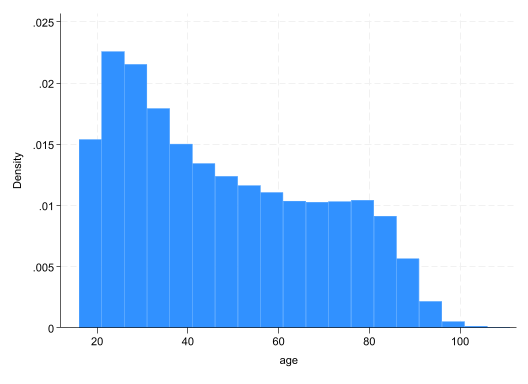

In [4]:
histogram age, width(5)


This table holds one randomly selected diagnostic code found during the observation period. The table is truncated to only include diagnostic codes with a count of 10 or more.

In [5]:
set linesize 132
groups description , select(f >= 10) ord(h) table 


  +---------------------------------------------------------------------------------------------------------------------------------
> -------------------------+
  | description                                                                                                                     
>  Freq.   Percent     %<= |
  |---------------------------------------------------------------------------------------------------------------------------------
> -------------------------|
  | Dementia care plan reviewed (situation)                                                                                         
>    705     15.39   15.39 |
  | Dementia                                                                                                                        
>    518     11.31   26.69 |
  | Alzheimer's disease                                                                                                             
>    507     11.07   37.76 |
  | Review of dementia adva

These tables holds one randomly selected prescrption during the observation period. The table is truncated to only include codes with a count of 10 or more.


In [6]:
set linesize 132
groups bnf_code , select(f >= 10) ord(h) table 


  +----------------------------------------------+
  |           bnf_code   Freq.   Percent     %<= |
  |----------------------------------------------|
  | Drugs for dementia    3078     99.23   99.23 |
  |      Other/unknown      23      0.74   99.97 |
  +----------------------------------------------+


### Results
#### Overall

In [7]:
diagt diag test


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     1,922      2,660 |     4,582 
    Normal |     1,180    419,238 |   420,418 
-----------+----------------------+----------
     Total |     3,102    421,898 |   425,000 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.1%      1.0%       1.1%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     41.9%     40.5%     43.4%
Specificity                      Pr(-|N)     99.7%     99.7%     99.7%
ROC area               (Sens. + Spec.)/2      0.71      0.70      0.72 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    149.45    139.

#### Males

In [8]:
diagt diag test if sex==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       651        899 |     1,550 
    Normal |       404    206,331 |   206,735 
-----------+----------------------+----------
     Total |     1,055    207,230 |   208,285 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      0.7%      0.7%       0.8%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     42.0%     39.5%     44.5%
Specificity                      Pr(-|N)     99.8%     99.8%     99.8%
ROC area               (Sens. + Spec.)/2      0.71      0.70      0.72 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    214.92    191.

#### Females

In [9]:
diagt diag test if sex==0


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     1,271      1,761 |     3,032 
    Normal |       776    212,898 |   213,674 
-----------+----------------------+----------
     Total |     2,047    214,659 |   216,706 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.4%      1.4%       1.4%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     41.9%     40.2%     43.7%
Specificity                      Pr(-|N)     99.6%     99.6%     99.7%
ROC area               (Sens. + Spec.)/2      0.71      0.70      0.72 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    115.43    106.

#### Age
*16-70*

In [10]:
diagt diag test if agecat==0


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       138        246 |       384 
    Normal |       127    338,558 |   338,685 
-----------+----------------------+----------
     Total |       265    338,804 |   339,069 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      0.1%      0.1%       0.1%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     35.9%     31.1%     41.0%
Specificity                      Pr(-|N)    100.0%    100.0%    100.0%
ROC area               (Sens. + Spec.)/2      0.68      0.66      0.70 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    958.39    769.

*70-90*

In [11]:
diagt diag test if agecat==70


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     1,547      1,951 |     3,498 
    Normal |       916     73,683 |    74,599 
-----------+----------------------+----------
     Total |     2,463     75,634 |    78,097 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      4.5%      4.3%       4.6%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     44.2%     42.6%     45.9%
Specificity                      Pr(-|N)     98.8%     98.7%     98.8%
ROC area               (Sens. + Spec.)/2      0.71      0.71      0.72 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     36.02     33.

In [12]:
diagt diag test if agecat==90


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       237        463 |       700 
    Normal |       137      6,997 |     7,134 
-----------+----------------------+----------
     Total |       374      7,460 |     7,834 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      8.9%      8.3%       9.6%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     33.9%     30.4%     37.5%
Specificity                      Pr(-|N)     98.1%     97.7%     98.4%
ROC area               (Sens. + Spec.)/2      0.66      0.64      0.68 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     17.63     14.

In [13]:
table age agecat


------------------------------------------------
        |                  agecat               
        |    Young   0Middle   Elderly     Total
--------+---------------------------------------
age     |                                       
  16    |    2,575                         2,575
  17    |    5,250                         5,250
  18    |    7,360                         7,360
  19    |    8,707                         8,707
  20    |    8,811                         8,811
  21    |    9,181                         9,181
  22    |    9,508                         9,508
  23    |    9,710                         9,710
  24    |    9,716                         9,716
  25    |    9,852                         9,852
  26    |    9,412                         9,412
  27    |    9,568                         9,568
  28    |    9,190                         9,190
  29    |    8,834                         8,834
  30    |    8,758                         8,758
  31    |    8,249 

#### Year at start of oberservation period 
*2004-2009*

In [14]:
diagt diag test if yearcat==2004


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       204        572 |       776 
    Normal |       297    148,927 |   149,224 
-----------+----------------------+----------
     Total |       501    149,499 |   150,000 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      0.5%      0.5%       0.6%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     26.3%     23.2%     29.5%
Specificity                      Pr(-|N)     99.8%     99.8%     99.8%
ROC area               (Sens. + Spec.)/2      0.63      0.61      0.65 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    132.08    112.

*2010-2015*

In [15]:
diagt diag test if yearcat==2010


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       601        870 |     1,471 
    Normal |       509    148,020 |   148,529 
-----------+----------------------+----------
     Total |     1,110    148,890 |   150,000 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.0%      0.9%       1.0%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     40.9%     38.3%     43.4%
Specificity                      Pr(-|N)     99.7%     99.6%     99.7%
ROC area               (Sens. + Spec.)/2      0.70      0.69      0.72 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    119.22    107.

*2016-2020*

In [16]:
diagt diag test if yearcat==2016


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     1,117      1,218 |     2,335 
    Normal |       374    122,291 |   122,665 
-----------+----------------------+----------
     Total |     1,491    123,509 |   125,000 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.9%      1.8%       1.9%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     47.8%     45.8%     49.9%
Specificity                      Pr(-|N)     99.7%     99.7%     99.7%
ROC area               (Sens. + Spec.)/2      0.74      0.73      0.75 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    156.90    140.

#### IMD of practice
*1-3*

In [17]:
diagt diag test if imdcat==0


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       598        800 |     1,398 
    Normal |       334    152,819 |   153,153 
-----------+----------------------+----------
     Total |       932    153,619 |   154,551 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      0.9%      0.9%       1.0%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     42.8%     40.2%     45.4%
Specificity                      Pr(-|N)     99.8%     99.8%     99.8%
ROC area               (Sens. + Spec.)/2      0.71      0.70      0.73 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    196.14    173.

*4-7*

In [18]:
diagt diag test if imdcat==4


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       714        988 |     1,702 
    Normal |       446    140,897 |   141,343 
-----------+----------------------+----------
     Total |     1,160    141,885 |   143,045 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.2%      1.1%       1.2%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     42.0%     39.6%     44.3%
Specificity                      Pr(-|N)     99.7%     99.7%     99.7%
ROC area               (Sens. + Spec.)/2      0.71      0.70      0.72 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    132.95    119.

*8-10*

In [19]:
diagt diag test if imdcat==8


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       608        871 |     1,479 
    Normal |       400    122,936 |   123,336 
-----------+----------------------+----------
     Total |     1,008    123,807 |   124,815 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.2%      1.1%       1.2%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     41.1%     38.6%     43.7%
Specificity                      Pr(-|N)     99.7%     99.6%     99.7%
ROC area               (Sens. + Spec.)/2      0.70      0.69      0.72 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    126.76    112.

#### Commissioning Regions
EAST OF ENGLAND

In [20]:
diagt diag test if regexm(region_name,"ENGLAND")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       385        567 |       952 
    Normal |       258     88,427 |    88,685 
-----------+----------------------+----------
     Total |       643     88,994 |    89,637 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.1%      1.0%       1.1%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     40.4%     37.3%     43.6%
Specificity                      Pr(-|N)     99.7%     99.7%     99.7%
ROC area               (Sens. + Spec.)/2      0.70      0.69      0.72 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    139.01    120.

London

In [21]:
diagt diag test if regexm(region_name,"LONDON")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |        39         55 |        94 
    Normal |        22     16,609 |    16,631 
-----------+----------------------+----------
     Total |        61     16,664 |    16,725 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      0.6%      0.5%       0.7%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     41.5%     31.4%     52.1%
Specificity                      Pr(-|N)     99.9%     99.8%     99.9%
ROC area               (Sens. + Spec.)/2      0.71      0.66      0.76 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    313.64    193.

Midlands

In [22]:
diagt diag test if regexm(region_name,"MID")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       248        360 |       608 
    Normal |       110     45,825 |    45,935 
-----------+----------------------+----------
     Total |       358     46,185 |    46,543 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.3%      1.2%       1.4%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     40.8%     36.9%     44.8%
Specificity                      Pr(-|N)     99.8%     99.7%     99.8%
ROC area               (Sens. + Spec.)/2      0.70      0.68      0.72 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    170.33    138.

Yorkshire

In [23]:
diagt diag test if regexm(region_name,"YORK")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       361        458 |       819 
    Normal |       218     85,074 |    85,292 
-----------+----------------------+----------
     Total |       579     85,532 |    86,111 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.0%      0.9%       1.0%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     44.1%     40.6%     47.6%
Specificity                      Pr(-|N)     99.7%     99.7%     99.8%
ROC area               (Sens. + Spec.)/2      0.72      0.70      0.74 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    172.45    147.

North West

In [24]:
diagt diag test if regexm(region_name,"NORTH")==1 & regexm(region_name,"WEST")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       191        314 |       505 
    Normal |       141     50,943 |    51,084 
-----------+----------------------+----------
     Total |       332     51,257 |    51,589 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.0%      0.9%       1.1%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     37.8%     33.6%     42.2%
Specificity                      Pr(-|N)     99.7%     99.7%     99.8%
ROC area               (Sens. + Spec.)/2      0.69      0.67      0.71 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    137.03    112.

South East

In [25]:
diagt diag test if regexm(region_name,"SOUTH")==1 & regexm(region_name,"EAST")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       517        571 |     1,088 
    Normal |       310     89,087 |    89,397 
-----------+----------------------+----------
     Total |       827     89,658 |    90,485 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.2%      1.1%       1.3%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     47.5%     44.5%     50.5%
Specificity                      Pr(-|N)     99.7%     99.6%     99.7%
ROC area               (Sens. + Spec.)/2      0.74      0.72      0.75 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    137.03    120.

South West

In [26]:
diagt diag test if regexm(region_name,"SOUTH")==1 & regexm(region_name,"WEST")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       172        317 |       489 
    Normal |        95     35,592 |    35,687 
-----------+----------------------+----------
     Total |       267     35,909 |    36,176 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.4%      1.2%       1.5%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     35.2%     30.9%     39.6%
Specificity                      Pr(-|N)     99.7%     99.7%     99.8%
ROC area               (Sens. + Spec.)/2      0.67      0.65      0.70 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    132.13    104.

#### System
SystmOne

In [27]:
diagt diag test if regexm(system,"One")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     1,012      1,454 |     2,466 
    Normal |       645    225,644 |   226,289 
-----------+----------------------+----------
     Total |     1,657    227,098 |   228,755 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.1%      1.0%       1.1%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     41.0%     39.1%     43.0%
Specificity                      Pr(-|N)     99.7%     99.7%     99.7%
ROC area               (Sens. + Spec.)/2      0.70      0.69      0.71 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    143.98    131.

Vision

In [28]:
diagt diag test if regexm(system,"Vision")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |        24         64 |        88 
    Normal |        71     13,585 |    13,656 
-----------+----------------------+----------
     Total |        95     13,649 |    13,744 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      0.6%      0.5%       0.8%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     27.3%     18.3%     37.8%
Specificity                      Pr(-|N)     99.5%     99.3%     99.6%
ROC area               (Sens. + Spec.)/2      0.63      0.59      0.68 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     52.46     34.

EMIS

In [29]:
diagt diag test if regexm(ustrupper(system),"EMIS")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       886      1,141 |     2,027 
    Normal |       464    179,874 |   180,338 
-----------+----------------------+----------
     Total |     1,350    181,015 |   182,365 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.1%      1.1%       1.2%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     43.7%     41.5%     45.9%
Specificity                      Pr(-|N)     99.7%     99.7%     99.8%
ROC area               (Sens. + Spec.)/2      0.72      0.71      0.73 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    169.88    153.

#### RA_Index
Index==1

In [30]:
diagt diag test if RA_index==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     1,518      2,053 |     3,571 
    Normal |       852    317,274 |   318,126 
-----------+----------------------+----------
     Total |     2,370    319,327 |   321,697 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.1%      1.1%       1.1%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     42.5%     40.9%     44.2%
Specificity                      Pr(-|N)     99.7%     99.7%     99.7%
ROC area               (Sens. + Spec.)/2      0.71      0.70      0.72 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    158.72    146.

Index==0

In [31]:
diagt diag test if RA_index==0


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       404        607 |     1,011 
    Normal |       328    101,964 |   102,292 
-----------+----------------------+----------
     Total |       732    102,571 |   103,303 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.0%      0.9%       1.0%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     40.0%     36.9%     43.1%
Specificity                      Pr(-|N)     99.7%     99.6%     99.7%
ROC area               (Sens. + Spec.)/2      0.70      0.68      0.71 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    124.62    109.

#### Ethnicity
Ethnicity==0000white

In [32]:
diagt diag test if ethnicity=="0white"


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     1,525      1,981 |     3,506 
    Normal |       839    253,636 |   254,475 
-----------+----------------------+----------
     Total |     2,364    255,617 |   257,981 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.4%      1.3%       1.4%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     43.5%     41.8%     45.2%
Specificity                      Pr(-|N)     99.7%     99.6%     99.7%
ROC area               (Sens. + Spec.)/2      0.72      0.71      0.72 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    131.93    122.

In [33]:
diagt diag test if ethnicity=="Other"


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |        49        116 |       165 
    Normal |        29     43,674 |    43,703 
-----------+----------------------+----------
     Total |        78     43,790 |    43,868 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      0.4%      0.3%       0.4%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     29.7%     22.8%     37.3%
Specificity                      Pr(-|N)     99.9%     99.9%    100.0%
ROC area               (Sens. + Spec.)/2      0.65      0.61      0.68 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    447.53    290.

In [34]:
diagt diag test if ethnicity=="Missing"


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       348        563 |       911 
    Normal |       312    121,928 |   122,240 
-----------+----------------------+----------
     Total |       660    122,491 |   123,151 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      0.7%      0.7%       0.8%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     38.2%     35.0%     41.4%
Specificity                      Pr(-|N)     99.7%     99.7%     99.8%
ROC area               (Sens. + Spec.)/2      0.69      0.67      0.71 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    149.66    130.

In [35]:
tempname memhold
postfile `memhold' str20 var prev sens spec ppv npv roc using "validity.dta",replace

quietly diagt diag test
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("all") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if sex==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Male") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if sex==0
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Female") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if agecat==0
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Age young") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if agecat==70
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Age middle") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if agecat==90
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Age elderly") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 


quietly diagt diag test if yearcat==2004
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Year 2004-2009") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if yearcat==2010
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Year 2010-2015") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc')

quietly diagt diag test if yearcat==2016
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Year 2016-2020") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 


quietly diagt diag test if imdcat==0
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("IMD 1,3") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if imdcat==4
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("IMD 4,7") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if imdcat==8
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("IMD 8,10") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 


quietly diagt diag test if regexm(region_name,"LONDON")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("London") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(region_name,"MID")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Midlands") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(region_name,"YORK")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Yorkshire") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(region_name,"NORTH")==1 & regexm(region_name,"WEST")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("North West") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(region_name,"SOUTH")==1 & regexm(region_name,"EAST")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("South East") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(region_name,"SOUTH")==1 & regexm(region_name,"WEST")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("South West") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(system,"One")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("SystemOne") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(system,"Vision")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Vision") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(ustrupper(system),"EMIS")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("EMIS") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if RA_index==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("RAIndex1") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if RA_index==0
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("RAIndex0") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if ethnicity=="0white"
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Ethnicity_0white") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if ethnicity=="Other"
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Ethnicity_Other") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 



quietly diagt diag test if ethnicity=="Missing"
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Ethnicity_Missing") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

postclose `memhold'

### Logistic Regression
#### PPV

In [36]:
drop if missing(imdcat)
drop if missing(sex)

(2,589 observations deleted)
(9 observations deleted)


In [37]:
logistic diag_pos if test==1


Logistic regression                                     Number of obs =  3,100
                                                        LR chi2(0)    =   0.00
                                                        Prob > chi2   =      .
Log likelihood = -2059.5752                             Pseudo R2     = 0.0000

------------------------------------------------------------------------------
    diag_pos |       Odds   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
       _cons |   1.627119   .0601878    13.16   0.000     1.513327    1.749466
------------------------------------------------------------------------------


In [38]:
logistic diag_pos i.bnf_code_values if test==1

note: 1.bnf_code_values != 0 predicts success perfectly;
      1.bnf_code_values omitted and 1 obs not used.

note: 3.bnf_code_values omitted because of collinearity.

Logistic regression                                     Number of obs =  3,099
                                                        LR chi2(1)    =   1.89
                                                        Prob > chi2   = 0.1691
Log likelihood = -2058.1506                             Pseudo R2     = 0.0005

-------------------------------------------------------------------------------------
           diag_pos | Odds ratio   Std. err.      z    P>|z|     [95% conf. interval]
--------------------+----------------------------------------------------------------
    bnf_code_values |
            020602  |          1  (empty)
Drugs for dementia  |   1.782067   .7468174     1.38   0.168     .7838049    4.051727
     Other/unknown  |          1  (omitted)
                    |
              _cons |   .9166667   .38263

In [39]:
gen newdiag=diag_pos

melogit newdiag i.sex i.yearcat i.agecat  i.region RA_index i.ethnic i.imdcat if test==1 || practice_id:,or
estimates store model1


Fitting fixed-effects model:

Iteration 0:  Log likelihood = -1920.6254  
Iteration 1:  Log likelihood = -1918.7298  
Iteration 2:  Log likelihood = -1918.7284  
Iteration 3:  Log likelihood = -1918.7284  

Refining starting values:

Grid node 0:  Log likelihood = -1906.3198

Fitting full model:

Iteration 0:  Log likelihood = -1906.3198  (not concave)
Iteration 1:  Log likelihood = -1889.4262  
Iteration 2:  Log likelihood = -1887.2421  
Iteration 3:  Log likelihood = -1887.0327  
Iteration 4:  Log likelihood = -1887.0324  
Iteration 5:  Log likelihood = -1887.0324  

Mixed-effects logistic regression               Number of obs     =      3,100
Group variable: practice_id                     Number of groups  =        254

                                                Obs per group:
                                                              min =          1
                                                              avg =       12.2
                                           

##### Likelihood ratio tests

In [40]:


quietly: melogit newdiag i.sex i.yearcat i.agecat  i.region RA_index i.ethnic if test==1 || practice_id:,or
estimates store model_imd

quietly:melogit newdiag i.sex i.yearcat i.agecat  i.region RA_index i.imdcat if test==1 || practice_id:,or
estimates store model_ethnicity

quietly:melogit newdiag i.yearcat i.agecat  i.region RA_index i.ethnic i.imdcat if test==1 || practice_id:,or
estimates store model_sex

quietly:melogit newdiag i.sex i.agecat  i.region RA_index i.ethnic i.imdcat if test==1 || practice_id:,or
estimates store model_year

quietly: melogit newdiag i.sex i.yearcat  i.region RA_index i.ethnic i.imdcat if test==1 || practice_id:,or
estimates store model_age



In [41]:
lrtest model1 model_sex
lrtest model1 model_year
lrtest model1 model_age
lrtest model1 model_ethnicity
lrtest model1 model_imd



Likelihood-ratio test
Assumption: model_sex nested within model1

 LR chi2(1) =   0.08
Prob > chi2 = 0.7817

Likelihood-ratio test
Assumption: model_year nested within model1

 LR chi2(2) = 201.56
Prob > chi2 = 0.0000

Likelihood-ratio test
Assumption: model_age nested within model1

 LR chi2(2) =  12.09
Prob > chi2 = 0.0024

Likelihood-ratio test
Assumption: model_ethnic~y nested within model1

 LR chi2(2) =   1.72
Prob > chi2 = 0.4236

Likelihood-ratio test
Assumption: model_imd nested within model1

 LR chi2(2) =   1.27
Prob > chi2 = 0.5291


#### NPV

In [42]:
logistic diag_neg if test==0


Logistic regression                                    Number of obs = 419,302
                                                       LR chi2(0)    =    0.00
                                                       Prob > chi2   =       .
Log likelihood = -16106.796                            Pseudo R2     =  0.0000

------------------------------------------------------------------------------
    diag_neg |       Odds   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
       _cons |   156.6916   3.048372   259.80   0.000     150.8294    162.7817
------------------------------------------------------------------------------


In [43]:
/* need to use the same response variable (newdiag) to line up the two model results */
replace newdiag=diag_neg 

melogit newdiag i.sex i.yearcat i.agecat i.region RA_index i.ethnic i.imdcat if test==0 || practice_id:,or
estimates store model2

(422,402 real changes made)

Fitting fixed-effects model:

Iteration 0:  Log likelihood = -42488.516  
Iteration 1:  Log likelihood = -14004.556  
Iteration 2:  Log likelihood = -13118.473  
Iteration 3:  Log likelihood = -12335.453  
Iteration 4:  Log likelihood = -12331.591  
Iteration 5:  Log likelihood = -12331.581  
Iteration 6:  Log likelihood = -12331.581  

Refining starting values:

Grid node 0:  Log likelihood = -12262.179

Fitting full model:

Iteration 0:  Log likelihood = -12262.179  (not concave)
Iteration 1:  Log likelihood = -12228.822  
Iteration 2:  Log likelihood = -12215.172  
Iteration 3:  Log likelihood = -12208.645  
Iteration 4:  Log likelihood =  -12208.24  
Iteration 5:  Log likelihood = -12208.238  
Iteration 6:  Log likelihood = -12208.238  

Mixed-effects logistic regression               Number of obs     =    419,302
Group variable: practice_id                     Number of groups  =        339

                                                Obs per grou

##### Likelihood ratio tests

In [44]:

quietly: melogit newdiag i.yearcat i.agecat i.region RA_index i.ethnic i.imdcat if test==0 || practice_id:,or
estimates store model2_sex
quietly: melogit newdiag i.sex i.agecat i.region RA_index i.ethnic i.imdcat if test==0 || practice_id:,or
estimates store model2_year
quietly: melogit newdiag i.sex i.yearcat i.region RA_index i.ethnic i.imdcat if test==0 || practice_id:,or
estimates store model2_age
quietly: melogit newdiag i.sex i.yearcat i.agecat i.region RA_index i.imdcat if test==0 || practice_id:,or
estimates store model2_ethnicity
quietly: melogit newdiag i.sex i.yearcat i.agecat i.region RA_index i.ethnic if test==0 || practice_id:,or
estimates store model2_imd


In [45]:
lrtest model2 model2_sex
lrtest model2 model2_year
lrtest model2 model2_age
lrtest model2 model2_ethnicity
lrtest model2 model2_imd



Likelihood-ratio test
Assumption: model2_sex nested within model2

 LR chi2(1) =  86.30
Prob > chi2 = 0.0000

Likelihood-ratio test
Assumption: model2_year nested within model2

 LR chi2(2) = 632.22
Prob > chi2 = 0.0000

Likelihood-ratio test
Assumption: model2_age nested within model2

 LR chi2(2) = 6363.52
Prob > chi2 =  0.0000

Likelihood-ratio test
Assumption: model2_ethni~y nested within model2

 LR chi2(2) =  35.17
Prob > chi2 = 0.0000

Likelihood-ratio test
Assumption: model2_imd nested within model2

 LR chi2(2) =   0.72
Prob > chi2 = 0.6961


In [46]:
etable, estimates(model1 model2) showstars showstarsnote title("Table 2. PPV (1) and NPV (2),  OR, Random effect") cstat(_r_b,nformat(%6.2f)) column(index)


Table 2. PPV (1) and NPV (2), OR, Random effect
------------------------------------------------------------------
                                                   1         2    
------------------------------------------------------------------
sex_coded                                                         
  1                                             1.02       1.47 **
yearcat                                                           
  2010-2015                                     1.68 **    0.52 **
  2016-2020                                     4.57 **    0.26 **
agecat                                                            
  0Middle                                       1.65 **    0.02 **
  Elderly                                       1.46 *     0.01 **
region                                                            
  LONDON COMMISSIONING REGION                   1.12       0.88   
  MIDLANDS COMMISSIONING REGION                 1.01       0.81   
  NORTH EAST 

### Summary of validation parameters

In [47]:
use validity.dta, clear
replace prev=round(prev, 0.1)
gen prev_a=round(((prev/100)*((sens/100)+(spec/100)-1)+1-(spec/100))*100,0.1)/*apparent prevalence*/
replace sens=round(sens, 0.1)
replace spec=round(spec,0.1)
replace ppv=round(ppv, 0.1)
replace npv=round(npv, 0.1)
replace roc=round(roc, 0.01)


(26 real changes made)
(25 real changes made)
(26 real changes made)
(26 real changes made)
(26 real changes made)
(26 real changes made)


In [48]:
%head 50

,var,prev,sens,spec,ppv,npv,roc,prev_a
1,all,1.1,41.9,99.7,62,99.4,.71,.7
2,Male,.7,42,99.8,61.7,99.6,.71,.5
3,Female,1.4,41.9,99.6,62.1,99.2,.71,.9
4,Age young,.1,35.9,100,52.1,99.9,.68,.1
5,Age middle,4.5,44.2,98.8,62.8,97.4,.71,3.2
6,Age elderly,8.9,33.9,98.1,63.4,93.8,.66,4.8
7,Year 2004-2009,.5,26.3,99.8,40.7,99.6,.63,.3
8,Year 2010-2015,1,40.9,99.7,54.1,99.4,.7,.7
9,Year 2016-2020,1.9,47.8,99.7,74.9,99,.74,1.2
10,"IMD 1,3",.9,42.8,99.8,64.2,99.5,.71,.6


In [49]:
/*texsave * using test3.tex, varlabels*/
/*
export excel using  validity2.xlsx, sheet(val_dementia, replace)
*/